**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [3]:
# write your code here
import numpy as np
import sympy as sm
from matplotlib import pyplot as plt
from types import SimpleNamespace
from scipy import optimize
from scipy import linalg
import ipywidgets as widgets
import math
from scipy.optimize import minimize_scalar

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $ (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [4]:
'''
How we are going to solve the problem:

1. Define the full maximization problem.
2. Substitute for $\\tilde{\omega}$ and C
3. Calculate the first derivative wrt. L
4. Set the first derivative equal to 0 and calculate for L. '''

# We deifne our parameters
alpha = sm.symbols('alpha')
kappa = sm.symbols('kappa')
nu = sm.symbols('nu')
w = sm.symbols('omega')
tau = sm.symbols('tau')
w_tilde = sm.symbols('w_tilde')
L = sm.symbols('L')
G = sm.symbols('G')
   
   # Step 1 and 2: 
#We do the substitution for w_tilde = (1-tau)*w = W
C = kappa + w_tilde * L

# We define our utility function
V = sm.log(C**alpha * G**(1-alpha)) - nu*(L**2 / 2)

    # Step 3:
# We find the first derivative of the utility function
V_diff = sm.diff(V, L)

    # Step 4: 
# We put it equal to zero and solve for L

L_star = sm.solve(V_diff, L)

# We choose the positive solution
opt = L_star[1]
opt



(-kappa*nu + sqrt(nu*(4*alpha*w_tilde**2 + kappa**2*nu)))/(2*nu*w_tilde)

This result is the same as the given result, that we were asked to verify, the result can be even further simplified to look like L^* = $\frac{-\kappa + \sqrt{ \kappa + 4\frac{\alpha}{\nu} \tilde{w}}}{2 \tilde{w}}$. 

Due to G not being a part of the function, it will not affect the result and thus the result will stay the same for all values of $G\in\left\{1.0 , 2.0\right\}$

....

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

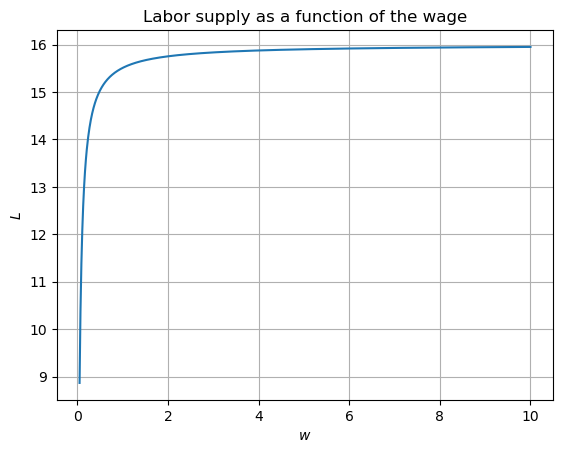

In [5]:

# We define our baseline parameters 
alpha_val = 0.5
kappa_val = 1.0
nu_val = 1 / (2 * 16**2)
tau_val = 0.30
G_val = 1

# we create a linspace for the wage values, tha twe are going to iterate over. 
w_values = np.linspace(0.05, 10.0, 1000)
  
L_values = [opt.subs([ (alpha, alpha_val),          # We substitute the values in the expression for our parameters. 
                        (kappa, kappa_val),
                        (nu, nu_val),
                        (tau, tau_val),
                        (G, G_val),
                        (w_tilde, w_val),])
                        for w_val in w_values]

# We plot the results
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(w_values, L_values)
ax.set_xlabel('$w$')
ax.set_ylabel('$L$')
ax.set_title('Labor supply as a function of the wage')
ax.grid(True)
plt.show()

We can here see that when the real wage increases, the labour supply increases, this goes on until a certain point of which the labour supply will converge. The happens when the labour supply is at 16.






....


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


/var/folders/5k/cbgd218j5d30nkg1dkw057100000gn/T/ipykernel_22407/3844933227.py:15: RuntimeWarning: invalid value encountered in double_scalars
  L = (-kappa + (kappa**2 + 4*(alpha / nu) * ((1-tau)*w)**2)**(1/2)) / (2*(1-tau)*w)


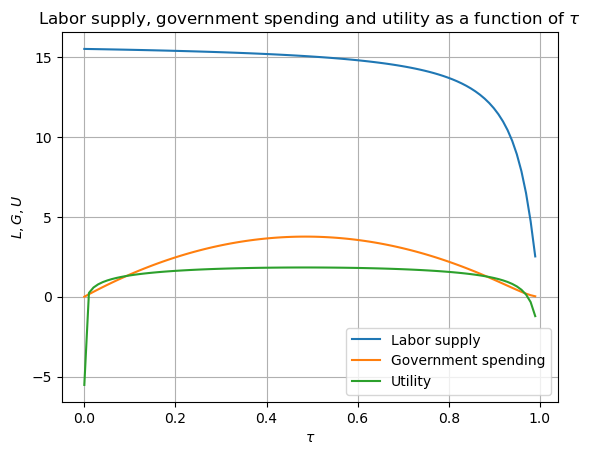

In [6]:
# We define the parameters for the government spending
tau = 0.30
w = 1.0
L = L_star[1]
alpha = 0.5 
kappa = 1.0 
nu = 1 / (2 * 16**2)
# We define the function for the government spending
G = tau*w*L*((1-tau)*w) 

# We create a linspace for tau values, that we are going to iterate over.
tau_values = np.linspace(1e-7, 1.0, 100)

def implied_values(tau) : 
    L = (-kappa + (kappa**2 + 4*(alpha / nu) * ((1-tau)*w)**2)**(1/2)) / (2*(1-tau)*w)
    G = tau*w*L*((1-tau)*w)
    utility = sm.log((kappa + w*L)**alpha * G**(1-alpha)) - nu*(L**2 / 2)
    return L, G, utility

# We create empty lists for the values we are going to append
L_values = []
G_values = []
utility_values = []

# We iterate over the tau values and append the values to the empty lists
for tau in tau_values :
    L, G, utility = implied_values(tau)
    L_values.append(L)
    G_values.append(G)
    utility_values.append(utility)

# We plot the results
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tau_values, L_values, label = 'Labor supply')
ax.plot(tau_values, G_values, label = 'Government spending')
ax.plot(tau_values, utility_values, label = 'Utility')
ax.set_xlabel('$\\tau$')
ax.set_ylabel('$L, G, U$')
ax.set_title('Labor supply, government spending and utility as a function of $\\tau$')
ax.grid(True)
ax.legend()
plt.show()




We can see that when tau increases...

the labour supply will go from being in convergence to decreasing. 

The utility will almost converge at a very steady state when tau is different from 0 and 1. 

The government spending will increase until tau = 0.5 and the decrease again.

.... 

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

the socially opytimal tax rate is 0.48457658923944374


/var/folders/5k/cbgd218j5d30nkg1dkw057100000gn/T/ipykernel_22407/1371594084.py:9: RuntimeWarning: invalid value encountered in double_scalars
  L = (-kappa + (kappa**2 + 4*(alpha / nu) * ((1-tau)*w)**2)**(1/2)) / (2*(1-tau)*w)


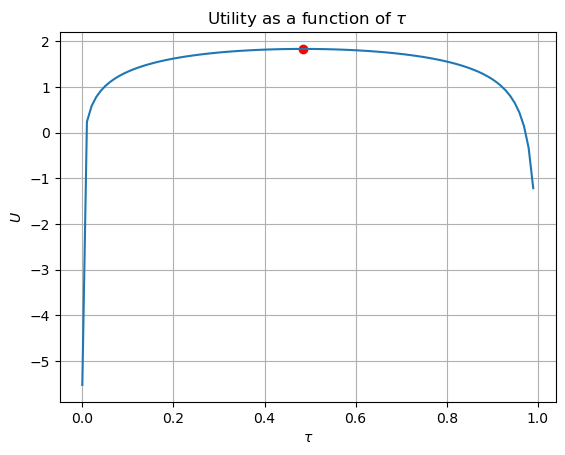

In [7]:

# We define the laour_utility function
def labour_utility(tau) :
    # We define the parameters
    alpha = 0.5
    kappa = 1.0
    nu = 1 / (2 * 16**2)
    omega = 1.0 
    # we define the functions for G and L
    L = (-kappa + (kappa**2 + 4*(alpha / nu) * ((1-tau)*w)**2)**(1/2)) / (2*(1-tau)*w)
    G = tau*w*L*((1-tau)*w)

    utility = np.log((kappa + w*L)**alpha * G**(1-alpha)) - nu*(L**2 / 2)
    
    return utility

# now we set our bounds for the maximization problem
bounds = [(0,1)]

# We set the tolerance level
tol = 1e-8

# We make our guess for the optimal tau
tau_guess = 0.5     # this value is arbitrary

# We run the optimization problem
optimal_tau = optimize.minimize( lambda tau: -labour_utility(tau), x0=tau_guess, bounds = bounds, tol = tol)

# We get to optimal tau
soc_opt_tau = optimal_tau.x[0]

# We print the socially optimal tau
print('the socially opytimal tax rate is', soc_opt_tau) 

# Now we plot the utility as a function of tau, to see how close our result is
tau_values = np.linspace(1e-7, 1.0, 100)
utility_values = [labour_utility(tau) for tau in tau_values]

# We plot the results
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(tau_values, utility_values)
ax.set_xlabel('$\\tau$')
ax.set_ylabel('$U$')
ax.set_title('Utility as a function of $\\tau$')
ax.grid(True)
plt.scatter(soc_opt_tau, labour_utility(soc_opt_tau), color='red', label='Optimal Tau')
plt.show()





When we make our inital guess tau =0.5 we get that the socially optimal tax rate is 0.48, which is very close to our guess. 

...

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.



Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.



**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [8]:
# we start by defining the new utility function
def utility_function(L, alpha, kappa, nu, w, tau, G, sigma, rho, epsilon):
    C = kappa + (1 - tau) * w * L
    utility = (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1)/(1-rho) - nu * (L**(1+epsilon))/(1+epsilon)
    return utility

# we define the workers problem
def optimize_worker_problem(alpha, kappa, nu, w, tau, G, sigma, rho, epsilon):
    objective_func = lambda L: -utility_function(L, alpha, kappa, nu, w, tau, G, sigma, rho, epsilon)
    bounds = (0, 24)  # Constraint: L in [0, 24]
    result = minimize_scalar(objective_func, bounds=bounds, method='bounded')
    optimal_L = result.x
    return optimal_L

# We define the problem of finding the optimal G, 
# we do this by updating the guess for G until we reach convergence
def solve_for_G(tau, alpha, kappa, nu, w, sigma, rho, epsilon):
    G = 0.0  # Initial guess for G
    error_tol = 1e-6        # Error tolerance, this is the tolerance for the convergence 
    max_iter = 1000         # Maximum number of iterations
    iter_count = 0          # Initialize iteration counter
    error = float('inf')    # Initialize error to a large value

    # We iterate until we reach convergence or hit the maximum number of iterations
    while error > error_tol and iter_count < max_iter:
        iter_count += 1
        optimal_L = optimize_worker_problem(alpha, kappa, nu, w, tau, G, sigma, rho, epsilon)
        updated_G = tau * w * optimal_L * ((1 - tau) * w)   # we calculate the new guess for G
        error = abs(G - updated_G)                          # we calculate the error
        G = updated_G                                       # we update the guess for G

    return G

# We set the parameters 
    # first the general parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
tau = 0.48
G = 0.0  # Initial guess for G

    # now we set the parameters for the two different sets
# Set 1 parameters
sigma_set1 = 1.001
rho_set1 = 1.001
epsilon_set1 = 1.0

# Set 2 parameters
sigma_set2 = 1.5
rho_set2 = 1.5
epsilon_set2 = 1.0

# Optimize the worker problem for Set 1
L_star_set1 = optimize_worker_problem(alpha, kappa, nu, w, tau, G, sigma_set1, rho_set1, epsilon_set1)

# Optimize the worker problem for Set 2
L_star_set2 = optimize_worker_problem(alpha, kappa, nu, w, tau, G, sigma_set2, rho_set2, epsilon_set2)

# We now find the G that solves G = tau * w * L
G_set1 = solve_for_G(tau, alpha, kappa, nu, w, sigma_set1, rho_set1, epsilon_set1)
G_set2 = solve_for_G(tau, alpha, kappa, nu, w, sigma_set2, rho_set2, epsilon_set2)

print('Set 1:')
print('The optimal value of L is:', L_star_set1)
print('The value of G that solves G = tau * w * L* is:', G_set1)
print()
print('Set 2:')
print('The optimal value of L is:', L_star_set2)
print('The value of G that solves G = tau * w * L* is:', G_set2)


Set 1:
The optimal value of L is: 23.999995716813203
The value of G that solves G = tau * w * L* is: 3.758166845456814

Set 2:
The optimal value of L is: 19.814758835888874
The value of G that solves G = tau * w * L* is: 2.7232467151027633


....

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K-1} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [9]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

The solution is  [-6.28004473 26.63066525]
the value of the function at the solution is  0.18734006976284345


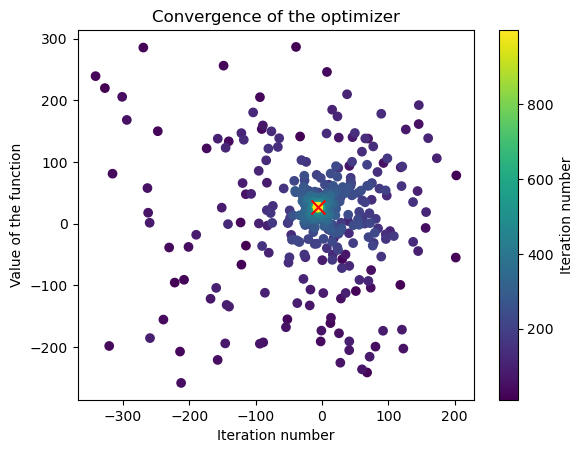

In [67]:

# We set a seed for our randomization
np.random.seed(67)


# We set the parameters
    # 1. We set the bounds for x1 and x2
bounds = [-600,600] 
# and the tolerance for tau 
tau = 1e-8
    # 2. We set the number of warmup iterations
K_warmup = 10
    # and the maximum number of iterations
K_max = 1000

# 3. Create the optimizer

def global_optimizer (bounds, tau, K_warmup, K_max):
    x_star = None
    f_best = np.inf

    # We cresa a list to store the results
    x_list = []
   
    for k in range(K_max) : 
    
        #3.a We draw a random point from the uniform distribution, this will be our starting point (initial guess)
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        #3.b We evaluate the function at the point
        if k >= K_warmup :
        
            #3.c We calculate chi^k
            chi_k = 0.50 * (2/ (1+np.exp((k - K_warmup)/100)))
            #3.d We set x_k0
            x_k0 = chi_k * x_k + (1-chi_k) * x_star
            x_list.append(x_k0)

        #3.e We run the optimizer to get our result x^(k*) 
        result = optimize.minimize(griewank, x_k, method='BFGS', tol=tau)
        x_opt = result.x
        f_opt = result.fun
    
        #3.f We update x_star if the result is better
        if k == 0 or f_opt < f_best :
            x_star = x_opt
            f_best = f_opt
        
        #3.g We evaluate the function of x_star
        if f_opt < tau:
            break

    #4. We return the result
    return x_star, x_list 


# 5. We run the optimizer
best_solution , x_list = global_optimizer(bounds, tau, K_warmup, K_max)


print('The solution is ', best_solution)
print('the value of the function at the solution is ', griewank(best_solution))

# we will now illustrate the results
# 6. We create a list with the values of x1 and x2 at each iteration
x_array = np.array(x_list)
x1_list = x_array[:,0]
x2_list = x_array[:,1]

# 7. We create a list with the iteration numbers
k_list = range(K_warmup,K_max)

# 8. We plot the results
plt.scatter(x1_list,x2_list, c=k_list, cmap='viridis')
plt.colorbar(label = 'Iteration number')
plt.xlabel('Iteration number')
plt.ylabel('Value of the function')
plt.title('Convergence of the optimizer')
plt.scatter(best_solution[0],best_solution[1], c='red', marker='x', s=100, label='Best solution')
plt.show()




With the seed set at 67, we kan see that the global minimum falls within the area that most of the guesses are at, this means that the guesses converges close to the global minimum. 

Having tries other seeds, we know that this is not always the case. 

....

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [71]:
# We impoprt a timer to measure the time it takes for the optimizers to run
import timeit 

# We set the new warmup and max iterations
K2_warmup = 100
K2_max = 10000

# We run the optimizer
best_solution2 , x_list2 = global_optimizer(bounds, tau, K2_warmup, K2_max)

# Measure the execution time for optimizer with K_warmup = 10 and K_max = 1000
time_1 = timeit.timeit(lambda: global_optimizer(bounds, tau, K_warmup, K2_max), number=1)

# Measure the execution time for optimizer with K_warmup = 100 K_max = 1000
time_2 = timeit.timeit(lambda: global_optimizer(bounds, tau, K2_warmup, K2_max), number=1)

# Print the execution times
print("Execution time for K_warmup = 10:", time_1, "seconds")
print("Execution time for K_warmup = 100:", time_2, "seconds")



Execution time for K_warmup = 10: 4.279517458000555 seconds
Execution time for K_warmup = 100: 23.096959707999304 seconds
